# Stochastic Gradient Descent

Use Keras and Tensorflow to train your first neural network.

# Example - Red Wine Quality

Skrip Python ini dirancang untuk mempersiapkan dataset untuk membangun model pembelajaran mesin yang memprediksi kualitas anggur merah. Ini melibatkan membaca dataset, membuat pembagian data latihan dan validasi, penskalaan fitur, dan pemisahan fitur dari variabel target.

Skrip ini dimulai dengan mengimpor pustaka yang diperlukan:

In [4]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('./red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


* pandas (sebagai pd): Pustaka manipulasi dan analisis data yang kuat.
* display dari IPython.display: Fungsi untuk menampilkan objek Python dalam format yang lebih kaya.

Di sini, red_wine adalah objek DataFrame yang berisi data dari file 'red-wine.csv'.

Dataset secara acak dibagi menjadi set data latihan dan validasi untuk memastikan model dapat dilatih dan divalidasi pada set data yang berbeda:
* df_train dibuat dengan mengambil sampel 70% data dari red_wine menggunakan sample(frac=0.7, random_state=0), di mana random_state memastikan reproduktibilitas.
* df_valid diperoleh dengan menghapus indeks df_train dari red_wine, memastikan tidak ada tumpang tindih antara data latihan dan validasi.

Penskalaan fitur penting untuk banyak algoritma pembelajaran mesin agar berperforma baik. Di sini, kami menyesuaikan skala fitur ke rentang [0, 1]:
* max_ dan min_ menghitung nilai maksimum dan minimum untuk setiap kolom di df_train.
* Baik df_train maupun df_valid diubah skala menggunakan nilai maksimum dan minimum ini untuk memastikan konsistensi dalam penskalaan.

Akhirnya, fitur dan variabel target ('quality') dipisahkan untuk dataset latihan dan validasi:
* X_train dan X_valid berisi fitur.
* y_train dan y_valid berisi variabel target.

Persiapan ini memungkinkan data untuk dengan mudah digunakan untuk melatih model pembelajaran mesin untuk memprediksi kualitas anggur merah.

Baris kode ini akan menghasilkan dimensi dari DataFrame X_train, khususnya jumlah baris dan kolom. Di sini, jumlah baris sesuai dengan jumlah sampel dalam dataset pelatihan (70% dari dataset asli jika Anda menggunakan kode yang ditunjukkan sebelumnya untuk membagi data), dan jumlah kolom sesuai dengan jumlah fitur dalam dataset, tanpa variabel target 'quality'.

Langkah ini berguna untuk memverifikasi bahwa dataset telah dipartisi dengan benar dan bahwa DataFrame berisi jumlah fitur yang diharapkan untuk pelatihan model. Jika kode ini dijalankan, makan akan membantu memastikan bahwa proses penanganan data berfungsi sesuai yang diharapkan.

In [9]:
print(X_train.shape)

(1119, 11)


Kode ini menggunakan library TensorFlow untuk membangun sebuah model neural network yang mendalam (deep neural network) untuk tujuan regresi atau klasifikasi dengan satu output. Model ini menggunakan arsitektur yang terdiri dari beberapa lapisan dengan banyak neuron.

Pertama, kita mengimpor modul yang diperlukan dari TensorFlow dan Keras:

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

c:\Users\robit\miniconda3\envs\deep_learning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model dibangun sebagai urutan (sequential) lapisan-lapisan menggunakan keras.Sequential. Setiap lapisan dalam model adalah lapisan Dense (lapisan yang sepenuhnya terhubung):
* Lapisan Pertama: Lapisan Dense dengan 512 unit/neuron, menggunakan fungsi aktivasi ReLU. input_shape=[11] menunjukkan bahwa setiap input ke model akan memiliki 11 fitur.
* Lapisan Kedua dan Ketiga: Kedua lapisan ini juga merupakan lapisan Dense dengan 512 unit dan fungsi aktivasi ReLU. Lapisan-lapisan ini membantu model mempelajari representasi yang lebih kompleks dari data.
* Lapisan Keempat: Lapisan keluaran ini adalah lapisan Dense dengan satu unit, tanpa fungsi aktivasi yang ditentukan, yang biasa digunakan untuk regresi. Untuk klasifikasi, dapat ditambahkan fungsi aktivasi seperti sigmoid (untuk klasifikasi biner) atau softmax (untuk klasifikasi multi-kelas).

Model ini cocok untuk tugas-tugas yang membutuhkan kemampuan generalisasi yang tinggi dari input numerik yang terdiri dari 11 fitur. Arsitektur ini, dengan banyak lapisan dan neuron, cenderung mampu menangkap hubungan yang kompleks dalam data tetapi juga bisa rawan terhadap overfitting terutama jika tidak ada data yang cukup atau tanpa regularisasi yang tepat.

Setelah mendefinisikan arsitektur model, langkah berikutnya adalah mengkompilasi model. Kompilasi model adalah proses di mana kita mengonfigurasi model untuk proses pelatihan, termasuk menetapkan optimizer, fungsi kehilangan (loss function), dan metrik yang akan digunakan selama pelatihan.

Untuk mengkompilasi model, kita menggunakan metode `compile` dari objek model:

In [11]:
model.compile(
    optimizer='adam',
    loss='mae',
)

* Optimizer: adam digunakan sebagai optimizer. Adam adalah salah satu optimizer yang paling sering digunakan dalam praktik deep learning. Optimizer ini adalah perluasan dari algoritma gradient descent stokastik yang telah diadaptasi untuk skala besar dan merupakan pilihan yang baik untuk banyak masalah karena efisiensi komputasinya dan penggunaan memori yang sedikit.
* Fungsi Kehilangan (Loss Function): mae singkatan dari Mean Absolute Error, sebuah fungsi loss yang menghitung rata-rata dari nilai absolut perbedaan antara nilai target dan nilai prediksi. Fungsi ini sering digunakan untuk masalah regresi karena memberikan interpretasi yang intuitif berupa rata-rata kesalahan dalam unit yang sama dengan target.

Dengan mengkompilasi model dengan konfigurasi ini, maka model siap untuk proses pelatihan. Adam secara efektif menyesuaikan laju pembelajaran selama pelatihan, dan Mean Absolute Error menyediakan penilaian yang langsung tentang seberapa jauh prediksi yang dihasilkan dari nilai sebenarnya. Setelah model dikompilasi, model dapat dilanjutkan ke tahap pelatihan dengan data yang telah disiapkan sebelumnya.

Setelah model dikompilasi, langkah selanjutnya adalah melatih model dengan data pelatihan. Pelatihan model melibatkan penyesuaian bobot pada jaringan saraf berdasarkan data yang diberikan, untuk mengurangi nilai kerugian atau error yang dihasilkan oleh model.

Untuk melatih model, kita menggunakan metode `fit` dari objek model. Berikut adalah detail kode yang digunakan:

In [12]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.3528 - val_loss: 0.1299
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1334 - val_loss: 0.1196
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1231 - val_loss: 0.1163
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1142 - val_loss: 0.1104
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1156 - val_loss: 0.1173
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1144 - val_loss: 0.1026
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1048 - val_loss: 0.1021
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1033 - val_loss: 0.1028
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1031 - val_loss: 0.1009
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1004 - val_loss: 0.1018


* X_train, y_train: Data fitur dan label target dari set pelatihan yang akan digunakan untuk melatih model.
* validation_data: Tuple yang berisi data validasi (X_valid, y_valid). Data validasi ini digunakan untuk mengevaluasi model setelah setiap epoch selama pelatihan, yang membantu dalam mengamati bagaimana model berperilaku terhadap data yang tidak pernah dilihat selama pelatihan.
* batch_size: Jumlah sampel data yang diproses sebelum model memperbarui parameter internal. Di sini, 256 berarti setiap batch berisi 256 sampel data.
* epochs: Jumlah kali seluruh dataset pelatihan dilewatkan secara keseluruhan oleh model. Di sini, 10 berarti seluruh data pelatihan akan dilewatkan sebanyak 10 kali ke dalam model.

Objek history yang dikembalikan oleh metode fit mengandung catatan nilai metrik pelatihan dan validasi setelah setiap epoch. Informasi ini berguna untuk analisis lebih lanjut, seperti visualisasi proses pelatihan, evaluasi overfitting, atau underfitting, dan penyesuaian parameter pelatihan jika diperlukan.

Proses pelatihan ini adalah inti dari pembelajaran mesin, di mana model secara aktif belajar untuk memprediksi label dari fitur dengan akurat berdasarkan data yang diberikan. Setelah pelatihan selesai, model akan siap untuk digunakan untuk membuat prediksi atau untuk evaluasi lebih lanjut.

Setelah model selesai dilatih, penting untuk mengevaluasi bagaimana model berkembang selama proses pelatihan. Salah satu cara untuk melakukan ini adalah dengan memvisualisasikan riwayat pelatihan yang termasuk kehilangan (loss) dan metrik lainnya selama setiap epoch.

Untuk memudahkan visualisasi, kita dapat mengonversi data riwayat yang diperoleh dari pelatihan ke dalam `DataFrame` menggunakan pandas. Berikut adalah kode untuk melakukan konversi:

<Axes: >

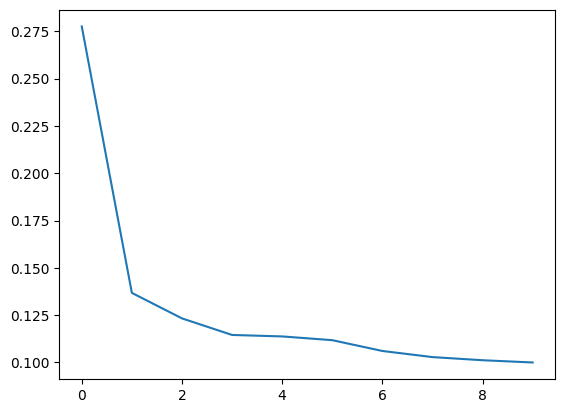

In [15]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot()

Setelah data riwayat pelatihan tersedia sebagai DataFrame, kita dapat menggunakan metode plot dari pandas untuk membuat grafik. Berikut ini cara untuk memvisualisasikan grafik kehilangan (loss) selama pelatihan:
* history.history: Objek ini berisi informasi tentang loss dan metrik lainnya yang dikumpulkan selama setiap epoch pelatihan.
* history_df['loss']: Kode mengakses kolom 'loss' dari DataFrame, yang berisi nilai kehilangan yang dicatat pada setiap epoch.
* plot(): Metode ini dari pandas memudahkan visualisasi data dalam bentuk grafik, di sini digunakan untuk memplot nilai 'loss'.

Visualisasi seperti ini sangat berguna untuk memahami dinamika pelatihan, seperti melihat apakah model mengalami overfitting, atau jika ada kebutuhan untuk menyesuaikan parameter pelatihan seperti laju pembelajaran atau jumlah epoch. Dengan grafik ini, kita dapat secara visual menilai seberapa cepat model belajar dan stabilisasi kehilangan selama pelatihan.